In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import numpy as np

## Exercice 1 : Demandes d’emprunts et crédits

Nous allons travailler sur un fichier de prêts immobiliers. Chaque ligne de ce fichier correspond à un prêt qui a été
accordé à un client. 
Chaque client est identifié de manière unique par son identifiant et nous disposons des informations
associées suivantes:
- la ville et le code postale de l’agence où le client a contracté le prêt
- le revenu mensuel du client
- les mensualités remboursées par le client
- la durée du prêt contracté, en nombre de mois
- le type de prêt
- le taux d’intérêt

Votre rôle cette fois-ci va être de modifier ce jeu de données pour calculer différentes variables nécessaires pour
identifier les clients qui sont à la limite de leur capacité de remboursement et déterminer les bénéfices réalisées par la
banque.

#### Q1. Importez les données du fichier "data_mm_prets.csv".

In [2]:
prets = pd.read_csv('./tp_mm_03_res/data_mm_prets.csv')

prets

,identifiant,ville,CP,revenu,remboursement,duree,type,taux
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014
...,...,...,...,...,...,...,...,...
239,224,PARIS,75008,5118.0,1248.79,300,immobilier,1.206
240,224,PARIS,75008,5118.0,238.20,25,automobile,3.423
241,225,BORDEAUX,33100,2356.0,876.43,180,immobilier,1.172
242,226,PARIS,75002,5098.0,2910.96,240,immobilier,1.140


#### Q2. Commençons par enrichir les données.

#### Q2.1. Créez une nouvelle variable taux_endettement calculant le taux d’endettement de chaque individu. Ce taux correspond au pourcentage du revenu remboursé chaque mois par un individu. Vous arrondirez le résultat à 2 chiffres après la virgule

In [3]:
# pourcentage su salaire a verser chaque mois
prets['taux_endettement'] = (prets['remboursement'] * 100 / prets['revenu'])

prets

,identifiant,ville,CP,revenu,remboursement,duree,type,taux,taux_endettement
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.799945
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.519774
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.500000
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.500267
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.799881
...,...,...,...,...,...,...,...,...,...
239,224,PARIS,75008,5118.0,1248.79,300,immobilier,1.206,24.399961
240,224,PARIS,75008,5118.0,238.20,25,automobile,3.423,4.654162
241,225,BORDEAUX,33100,2356.0,876.43,180,immobilier,1.172,37.199915
242,226,PARIS,75002,5098.0,2910.96,240,immobilier,1.140,57.100039


#### Q2.2. Pour éviter toute confusion, renommez la variable taux en taux_interet.

In [4]:
prets = prets.rename(columns={"taux": "taux_interet"})

prets

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.799945
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.519774
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.500000
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.500267
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.799881
...,...,...,...,...,...,...,...,...,...
239,224,PARIS,75008,5118.0,1248.79,300,immobilier,1.206,24.399961
240,224,PARIS,75008,5118.0,238.20,25,automobile,3.423,4.654162
241,225,BORDEAUX,33100,2356.0,876.43,180,immobilier,1.172,37.199915
242,226,PARIS,75002,5098.0,2910.96,240,immobilier,1.140,57.100039


#### Q2.3. Créez une variable (colonne) cout_total qui correspond au coût total comme son nom l’indique, à partir des mensualités de remboursement et de la durée.

In [5]:
# cout_total = remboursement * duree
prets['cout_total'] = prets['remboursement'] * prets['duree']

prets

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.799945,271212.0
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.519774,15360.0
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.500000,374355.0
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.500267,132609.6
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.799881,105485.4
...,...,...,...,...,...,...,...,...,...,...
239,224,PARIS,75008,5118.0,1248.79,300,immobilier,1.206,24.399961,374637.0
240,224,PARIS,75008,5118.0,238.20,25,automobile,3.423,4.654162,5955.0
241,225,BORDEAUX,33100,2356.0,876.43,180,immobilier,1.172,37.199915,157757.4
242,226,PARIS,75002,5098.0,2910.96,240,immobilier,1.140,57.100039,698630.4


#### Q2.4. Créez enfin une variable benefices correspondant aux bénéfices mensuels réalisés par la banque sur le prêt. On simplifiera le calcul des bénéfices par:
- benefices = (cout_total × taux_interet) / (100 × 24)

In [6]:
prets['benefices'] = (prets['cout_total'] * prets['taux_interet']) / (100 * 24)

prets

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.799945,271212.0,131.989840
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.519774,15360.0,23.686400
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.500000,374355.0,182.966006
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.500267,132609.6,53.706888
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.799881,105485.4,44.567581
...,...,...,...,...,...,...,...,...,...,...,...
239,224,PARIS,75008,5118.0,1248.79,300,immobilier,1.206,24.399961,374637.0,188.255093
240,224,PARIS,75008,5118.0,238.20,25,automobile,3.423,4.654162,5955.0,8.493319
241,225,BORDEAUX,33100,2356.0,876.43,180,immobilier,1.172,37.199915,157757.4,77.038197
242,226,PARIS,75002,5098.0,2910.96,240,immobilier,1.140,57.100039,698630.4,331.849440


#### Q3. Un peu de visualisation préliminaire.

#### Q3.1. En utilisant matplotlib, tracez les nuages de points (plt.scatter) des revenus des clients par rapport aux taux d’intérêt de leur prêts pour les agences de Paris et Toulouse uniquement. Il faut pouvoir distinguer les prêts par agence. N’oubliez pas la légende et le titre.

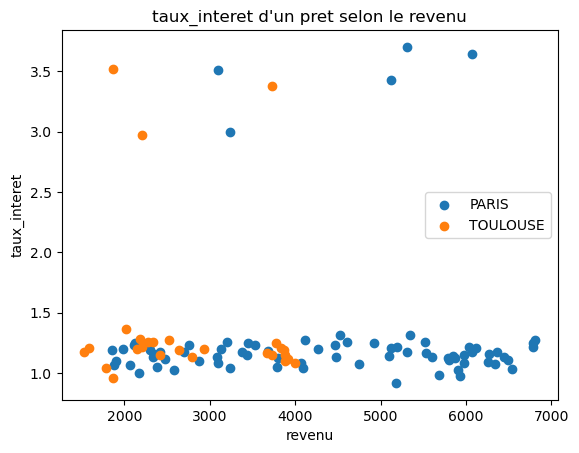

In [7]:
display = prets[(prets['ville'] == 'PARIS') | (prets['ville'] == 'TOULOUSE')]

groups = display.groupby('ville')
listeVilleLabels = []
for ville, group in groups:
	listeVilleLabels.append(ville)
	plt.scatter(x=group['revenu'], y=group['taux_interet'])
plt.legend(listeVilleLabels)
plt.xlabel("revenu")
plt.ylabel("taux_interet")
plt.title("taux_interet d'un pret selon le revenu")

plt.show()

#### Q3.2. Réalisez le même graphique pour toutes les agences. Votre code doit fonctionner quel que soit le nombre d’agence.

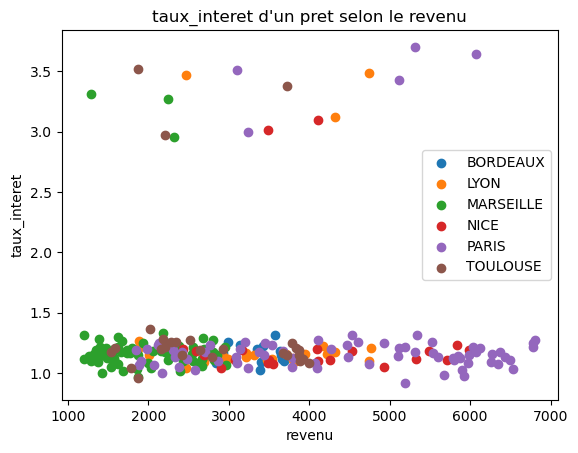

In [8]:
groups = prets.groupby('ville')
listeVilleLabels = []
for ville, group in groups:
	listeVilleLabels.append(ville)
	plt.scatter(x=group['revenu'], y=group['taux_interet'])
plt.legend(listeVilleLabels)
plt.xlabel("revenu")
plt.ylabel("taux_interet")
plt.title("taux_interet d'un pret selon le revenu")

plt.show()

#### Q3.3. Au lieu d’utiliser matplotlib, refaites plus simplement ce même graphique grâce à seaborn, sa fonction scatterplot et l’option hue.

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: xlabel='revenu', ylabel='taux_interet'>

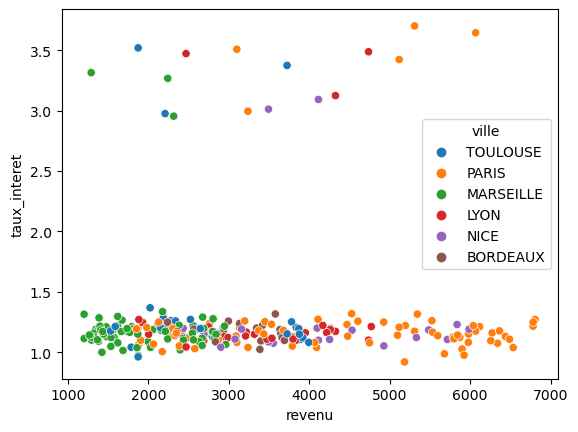

In [9]:
sns.scatterplot(x=prets['revenu'], y=prets['taux_interet'], hue=prets['ville'])

#### Q4. Un peu de filtrage et de manipulations.

#### Q4.1. Affichez les prêts de type ’automobile’.

In [10]:
prets_automobiles = prets[prets['type'] == 'automobile']

prets_automobiles

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices
1,1,PARIS,75009,5310.0,240.0,64,automobile,3.701,4.519774,15360.0,23.686400
65,63,NICE,6300,4114.0,302.9,24,automobile,3.092,7.362664,7269.6,9.365668
67,64,LYON,69004,4326.0,236.1,46,automobile,3.124,5.457698,10860.6,14.136881
87,83,TOULOUSE,31000,2207.0,253.3,60,automobile,2.975,11.477118,15198.0,18.839188
100,95,PARIS,75016,6069.0,341.4,24,automobile,3.644,5.625309,8193.6,12.440616
106,101,LYON,69008,4737.0,214.8,47,automobile,3.487,4.534516,10095.6,14.668066
120,113,MARSEILLE,13006,2314.0,253.2,49,automobile,2.954,10.942092,12406.8,15.270703
132,124,NICE,6000,3493.0,309.9,56,automobile,3.012,8.872030,17354.4,21.779772
141,133,PARIS,75011,3099.0,291.2,78,automobile,3.508,9.396580,22713.6,33.199712
154,144,MARSEILLE,13010,2240.0,316.6,81,automobile,3.267,14.133929,25644.6,34.908712


#### Q4.2. Affichez uniquement les identifiants des clients ayant contractés un prêt de type ’automobile’.

In [11]:
prets_automobiles['identifiant'].drop_duplicates()

1        1
65      63
67      64
87      83
100     95
106    101
120    113
132    124
141    133
154    144
158    147
159    148
172    159
209    195
225    211
240    224
Name: identifiant, dtype: int64

#### Q4.3. Affichez les identifiants et les revenus des clients ayant contractés un prêt de type ’automobile’.

In [12]:
prets_automobiles[['identifiant', 'revenu']].drop_duplicates()

,identifiant,revenu
1,1,5310.0
65,63,4114.0
67,64,4326.0
87,83,2207.0
100,95,6069.0
106,101,4737.0
120,113,2314.0
132,124,3493.0
141,133,3099.0
154,144,2240.0


#### Q4.4. Nous faisons un peu de prospection. On ne propose de prêts qu’aux clients capable de rembourser ! Affichez les clients ayant un revenu supérieur à 4000 euros mensuel.

In [13]:
prets[prets['revenu'] > 4000]['identifiant'].drop_duplicates()

1        1
8        7
16      15
17      16
18      17
19      18
23      22
24      23
26      25
27      26
34      33
37      36
51      50
62      61
64      63
66      64
70      67
75      72
80      77
83      80
89      85
93      89
95      91
99      95
106    101
110    104
118    112
122    115
126    119
127    120
129    122
133    125
137    129
146    137
147    138
150    141
155    145
166    154
169    157
174    161
176    163
181    168
186    173
188    175
189    176
194    181
195    182
197    184
206    193
215    201
224    210
227    212
229    214
234    219
236    221
239    224
242    226
Name: identifiant, dtype: int64

#### Q4.5. Affichez les personnes ayant un revenu supérieur à 4000 euros mensuel et ayant déjà contracté un prêt automobile.

In [14]:
above_4000 = prets[prets['revenu'] > 4000].drop_duplicates()

prets_automobiles = prets[prets['type'] == 'automobile'].drop_duplicates()

prets_automobiles.merge(above_4000, on='identifiant', how='inner')

,identifiant,ville_x,CP_x,revenu_x,remboursement_x,duree_x,type_x,taux_interet_x,taux_endettement_x,cout_total_x,...,ville_y,CP_y,revenu_y,remboursement_y,duree_y,type_y,taux_interet_y,taux_endettement_y,cout_total_y,benefices_y
0,1,PARIS,75009,5310.0,240.0,64,automobile,3.701,4.519774,15360.0,...,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.519774,15360.0,23.686400
1,1,PARIS,75009,5310.0,240.0,64,automobile,3.701,4.519774,15360.0,...,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.500000,374355.0,182.966006
2,63,NICE,6300,4114.0,302.9,24,automobile,3.092,7.362664,7269.6,...,NICE,6300,4114.0,1283.57,300,immobilier,1.099,31.200049,385071.0,176.330429
3,63,NICE,6300,4114.0,302.9,24,automobile,3.092,7.362664,7269.6,...,NICE,6300,4114.0,302.90,24,automobile,3.092,7.362664,7269.6,9.365668
4,64,LYON,69004,4326.0,236.1,46,automobile,3.124,5.457698,10860.6,...,LYON,69004,4326.0,1358.36,240,immobilier,1.172,31.399908,326006.4,159.199792
5,64,LYON,69004,4326.0,236.1,46,automobile,3.124,5.457698,10860.6,...,LYON,69004,4326.0,236.10,46,automobile,3.124,5.457698,10860.6,14.136881
6,95,PARIS,75016,6069.0,341.4,24,automobile,3.644,5.625309,8193.6,...,PARIS,75016,6069.0,977.11,240,immobilier,1.174,16.100016,234506.4,114.712714
7,95,PARIS,75016,6069.0,341.4,24,automobile,3.644,5.625309,8193.6,...,PARIS,75016,6069.0,341.40,24,automobile,3.644,5.625309,8193.6,12.440616
8,101,LYON,69008,4737.0,214.8,47,automobile,3.487,4.534516,10095.6,...,LYON,69008,4737.0,214.80,47,automobile,3.487,4.534516,10095.6,14.668066
9,101,LYON,69008,4737.0,214.8,47,automobile,3.487,4.534516,10095.6,...,LYON,69008,4737.0,810.03,300,immobilier,1.099,17.100063,243009.0,111.277871


#### Q4.6. Via un tri (.sort_values(...)), affichez les 5 prêts les plus rentables pour la banque. Quels sont les types de prêts les plus rentables ?

In [15]:
prets.sort_values('benefices', ascending=False)
# immobilier plus rentable

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices
8,7,NICE,6000,5486.0,2956.95,300,immobilier,1.184,53.899927,887085.0,437.628600
23,22,NICE,6300,5838.0,3018.25,240,immobilier,1.229,51.700069,724380.0,370.942925
186,173,PARIS,75006,6784.0,3744.77,180,immobilier,1.248,55.200029,674058.6,350.510472
242,226,PARIS,75002,5098.0,2910.96,240,immobilier,1.140,57.100039,698630.4,331.849440
181,168,PARIS,75003,6366.0,2807.41,240,immobilier,1.176,44.100063,673778.4,330.151416
...,...,...,...,...,...,...,...,...,...,...,...
225,211,TOULOUSE,31400,3724.0,215.00,43,automobile,3.374,5.773362,9245.0,12.996929
100,95,PARIS,75016,6069.0,341.40,24,automobile,3.644,5.625309,8193.6,12.440616
158,147,MARSEILLE,13015,1288.0,269.80,30,automobile,3.314,20.947205,8094.0,11.176465
65,63,NICE,6300,4114.0,302.90,24,automobile,3.092,7.362664,7269.6,9.365668


#### Q4.7. Fixez le taux d’intérêt à 1.05% pour les trois premiers clients du dataframe. Fixez celui des prêts du client d’identifiant 7 à 1.25%.

In [16]:
prets.loc[prets['identifiant'].isin([0, 1, 2]), 'taux_interet'] = 1.05
prets.loc[prets['identifiant'].isin([0, 1, 2]), 'taux_interet'] = 1.05
prets.loc[prets['identifiant'].isin([0, 1, 2]), 'taux_interet'] = 1.05
prets.loc[prets['identifiant'] == 7, 'taux_interet'] = 1.25

prets


,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.050,30.799945,271212.0,131.989840
1,1,PARIS,75009,5310.0,240.00,64,automobile,1.050,4.519774,15360.0,23.686400
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.050,23.500000,374355.0,182.966006
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,1.050,29.500267,132609.6,53.706888
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.799881,105485.4,44.567581
...,...,...,...,...,...,...,...,...,...,...,...
239,224,PARIS,75008,5118.0,1248.79,300,immobilier,1.206,24.399961,374637.0,188.255093
240,224,PARIS,75008,5118.0,238.20,25,automobile,3.423,4.654162,5955.0,8.493319
241,225,BORDEAUX,33100,2356.0,876.43,180,immobilier,1.172,37.199915,157757.4,77.038197
242,226,PARIS,75002,5098.0,2910.96,240,immobilier,1.140,57.100039,698630.4,331.849440


#### Q4.8. Dess erreurs se sont glissées dans les taux des prêts réalisés par l’agence parisienne et par l’agence marseillaise. Affectez un taux unique fixe de 1.33 pour les crédits de l’agence de Paris et augmentez le taux d’intérêt des prêts de l’agence de Marseille de 0.5%.

In [17]:
prets.loc[prets['ville'] == 'PARIS', 'taux_interet'] = 1.33
prets.loc[prets['ville'] == 'MARSEILLE', 'taux_interet'] += 0.5

prets

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.050,30.799945,271212.0,131.989840
1,1,PARIS,75009,5310.0,240.00,64,automobile,1.330,4.519774,15360.0,23.686400
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.330,23.500000,374355.0,182.966006
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,1.550,29.500267,132609.6,53.706888
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.514,34.799881,105485.4,44.567581
...,...,...,...,...,...,...,...,...,...,...,...
239,224,PARIS,75008,5118.0,1248.79,300,immobilier,1.330,24.399961,374637.0,188.255093
240,224,PARIS,75008,5118.0,238.20,25,automobile,1.330,4.654162,5955.0,8.493319
241,225,BORDEAUX,33100,2356.0,876.43,180,immobilier,1.172,37.199915,157757.4,77.038197
242,226,PARIS,75002,5098.0,2910.96,240,immobilier,1.330,57.100039,698630.4,331.849440


#### Q5. Quelques agrégations.

#### Q5.1. Combien de prêts automobiles ont été accordés ? Quel est le coût total moyen de ces derniers ?

In [18]:
group_by_type = prets.groupby('type')

nb_prets_automobiles = group_by_type.get_group('automobile').count()['identifiant']

cout_total_moyen_prets_automobiles = group_by_type.get_group('automobile')['cout_total'].mean()

#### Q5.2. En utilisant matplotlib, représentez un diagramme à barres (plt.bar) illustrant le nombre de prêts selon leur type. Représentez également un diagramme circulaire (plt.pie) représentant les proportions de prêts selon leur type. Si vous pouvez, tracez les deux sur la même figure !

([<matplotlib.patches.Wedge at 0x21e57364310>,
 [Text(1.0767412561950618, 0.22500726034392846, 'automobile'),
  Text(-1.0767412456617107, -0.22500731074982402, 'immobilier')])

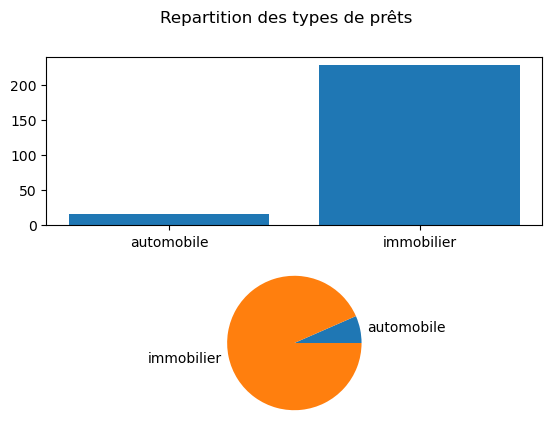

In [19]:
fig, axs = plt.subplots(2)
fig.suptitle('Repartition des types de prêts')
axs[0].bar(group_by_type.groups.keys(), group_by_type.count()['identifiant'])
axs[1].pie(group_by_type.count()['identifiant'], labels=group_by_type.groups.keys())

#### Q5.3. Générez un diagramme à barres représentant le nombre de prêts accordés par type et par agence.

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: xlabel='ville', ylabel='count'>

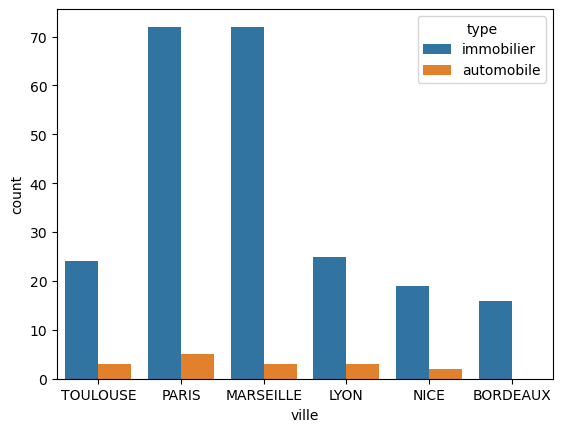

In [20]:
# stacked diagram y = (auto + immo), x = agences

sns.countplot(prets, x='ville', hue='type')

#### Q5.4. Le taux d’endettement maximal légalement autorisé est de 35%. Combien de clients ont dépassés ce seuil ? Qu’en est-il si on considère uniquement pour l’agence de Paris ?


In [21]:
prets[(prets['taux_endettement'] > 35) & (prets['ville'] == 'PARIS')].count()['identifiant']

16

#### Q5.5. Cette information nous semble particulièrement intéressante et nous souhaitons la sauvegarder. Créez une nouvelle colonne booléenne "risque" indiquant si le client est un client dit "à risque".

In [22]:
# # prets['risque'] = 
# prets[(prets['taux_endettement'] > 35)]

prets['risque'] = np.where(prets['taux_endettement'] > 35, True, False)

prets

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.050,30.799945,271212.0,131.989840,False
1,1,PARIS,75009,5310.0,240.00,64,automobile,1.330,4.519774,15360.0,23.686400,False
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.330,23.500000,374355.0,182.966006,False
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,1.550,29.500267,132609.6,53.706888,False
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.514,34.799881,105485.4,44.567581,False
...,...,...,...,...,...,...,...,...,...,...,...,...
239,224,PARIS,75008,5118.0,1248.79,300,immobilier,1.330,24.399961,374637.0,188.255093,False
240,224,PARIS,75008,5118.0,238.20,25,automobile,1.330,4.654162,5955.0,8.493319,False
241,225,BORDEAUX,33100,2356.0,876.43,180,immobilier,1.172,37.199915,157757.4,77.038197,True
242,226,PARIS,75002,5098.0,2910.96,240,immobilier,1.330,57.100039,698630.4,331.849440,True


#### Q5.6. On peut remarquer que certains clients ont contracté plusieurs prêts au sein de notre établissement. Cela fausse donc potentiellement les calculs réalisés précédemment. Créez un dataframe profil_clients où il y n’y a qu’une seule ligne par client, avec le résumé de ses informations (somme des remboursements, du taux d’endettement, du coût total et des bénéfices réalisés.)

In [23]:
profil_clients = prets.groupby('identifiant')

profil_clients = profil_clients.agg(
	identifiant=pd.NamedAgg(column="identifiant", aggfunc='first'),
	remboursement=pd.NamedAgg(column="remboursement", aggfunc='sum'),
	taux_endettement=pd.NamedAgg(column="taux_endettement", aggfunc='sum'),
	cout_total=pd.NamedAgg(column="cout_total", aggfunc='sum'),
	benefices=pd.NamedAgg(column="benefices", aggfunc='sum')
)

profil_clients

,identifiant,remboursement,taux_endettement,cout_total,benefices
identifiant,,,,,
0,0,1130.05,30.799945,271212.0,131.989840
1,1,1487.85,28.019774,389715.0,206.652406
2,2,552.54,29.500267,132609.6,53.706888
3,3,586.03,34.799881,105485.4,44.567581
4,4,423.61,28.699864,101666.4,51.214449
...,...,...,...,...,...
223,223,672.13,31.599906,161311.2,83.949037
224,224,1486.99,29.054123,380592.0,196.748411
225,225,876.43,37.199915,157757.4,77.038197


#### Q5.7. Recalculez le nombre exact de personnes en situation bancaire risquée à partir du taux d’endettement (qui doit être supérieur à 35%)

In [24]:
profil_clients['risque'] = np.where(profil_clients['taux_endettement'] > 35, True, False)

profil_clients[profil_clients['risque'] == True].count()['identifiant']

63

#### Q5.8. Quel est le bénéfice mensuel total réalisé par l’agence toulousaine ?

In [25]:
prets.groupby('ville').get_group('TOULOUSE')['remboursement'].sum()

19286.18

#### Q5.9. Calculez le bénéfice dégagé par chacune des agences, par types de prêts. Vous présenterez vos résultats sous la forme d’un tableau simple (via un group_by)

In [26]:
prets.groupby(['ville', 'type'])['benefices'].sum()

ville      type      
BORDEAUX   immobilier    1681.321165
LYON       automobile      47.380436
           immobilier    2967.401106
MARSEILLE  automobile      61.355880
           immobilier    4334.555792
NICE       automobile      31.145440
           immobilier    2651.590936
PARIS      automobile      99.495111
           immobilier    9916.835494
TOULOUSE   automobile      61.219767
           immobilier    2076.836061
Name: benefices, dtype: float64

#### Q5.10. Pour aller plus loin, on souhaite avoir un tableau à double entrée (via un pivot_table) présentant cette foisci les bénéfices moyens réalisés par chaque agence, pour chaque type de prêt. Quelle ville semble la plus intéressante où développer les prêts immobiliers ?

In [27]:
prets.pivot_table(values='benefices', index=['ville'], columns=['type'], aggfunc='mean')

# 139.557418 = NICE

type,automobile,immobilier
ville,,
BORDEAUX,NaN,105.082573
LYON,15.793479,118.696044
MARSEILLE,20.451960,60.202164
NICE,15.572720,139.557418
PARIS,19.899022,137.733826
TOULOUSE,20.406589,86.534836


#### Q5.11. Représentez le bénéfice mensuel réalisé en fonction du revenu du client pour les prêts immobiliers (sns.scatterplot) en utilisant des couleurs différentes pour les agences.

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


[Text(0.5, 1.0, 'bénéfice mensuel réalisé en fonction du revenu du client pour les prêts immobiliers')]

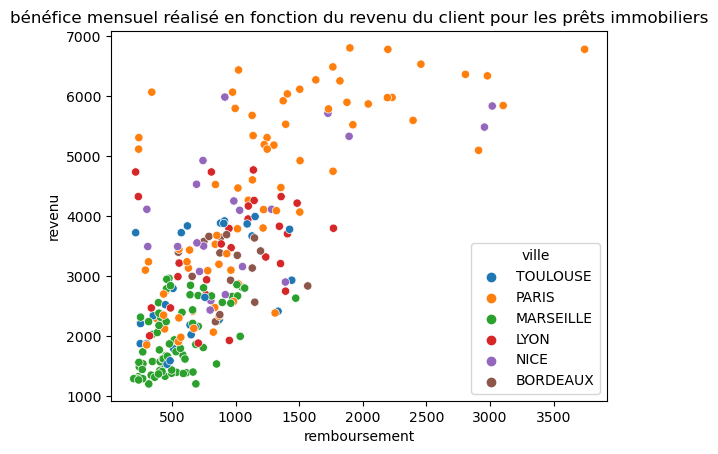

In [28]:
prets_immobiliers = prets[prets['type'] == 'immobilier']

sns.scatterplot(x=prets['remboursement'], y=prets['revenu'], hue=prets['ville']).set(title='bénéfice mensuel réalisé en fonction du revenu du client pour les prêts immobiliers')

#### Q5.12. Générez un diagramme à barres (sns.barplot) illustrant les remboursements mensuels par agence et par type de prêts (via les couleurs).

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: xlabel='ville', ylabel='remboursement'>

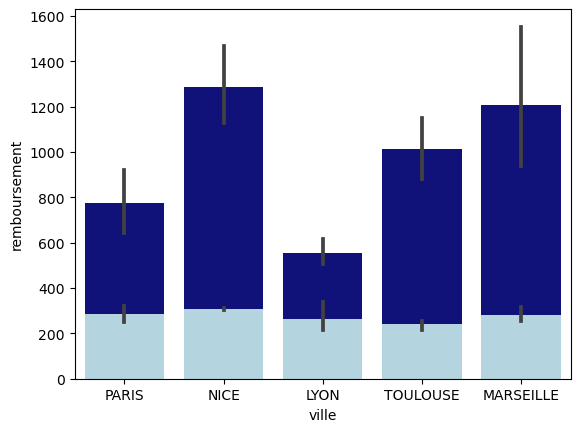

In [29]:
# prets.plot(kind='bar', stacked=True, x='ville', y='remboursement', sharex='type')

sns.barplot(prets[prets['type'] == 'immobilier'], x='ville', y='remboursement', color='darkblue')
sns.barplot(prets[prets['type'] == 'automobile'], x='ville', y='remboursement', color='lightblue')

In [30]:
prets

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.050,30.799945,271212.0,131.989840,False
1,1,PARIS,75009,5310.0,240.00,64,automobile,1.330,4.519774,15360.0,23.686400,False
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.330,23.500000,374355.0,182.966006,False
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,1.550,29.500267,132609.6,53.706888,False
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.514,34.799881,105485.4,44.567581,False
...,...,...,...,...,...,...,...,...,...,...,...,...
239,224,PARIS,75008,5118.0,1248.79,300,immobilier,1.330,24.399961,374637.0,188.255093,False
240,224,PARIS,75008,5118.0,238.20,25,automobile,1.330,4.654162,5955.0,8.493319,False
241,225,BORDEAUX,33100,2356.0,876.43,180,immobilier,1.172,37.199915,157757.4,77.038197,True
242,226,PARIS,75002,5098.0,2910.96,240,immobilier,1.330,57.100039,698630.4,331.849440,True


## Exercice 2 : Les jeux olympiques

#### Q1. Importation et exploration préliminaire (en vue d’un petit nettoyage).

#### Q1.1. Importez le fichier CSV sur les jeux olympiques dans un dataframe, en utilisant toutes les colonnes et sans spécifier d’index.

In [31]:
jeux = pd.read_csv('./tp_mm_03_res/120-years-of-olympic-history-athletes-and-results.csv')

jeux

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


#### Q1.2. Combien y-a-t-il de valeurs nulles par colonnes ? et au total ?

In [34]:
jeux.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

#### Q1.3. On cherche à identifier si certains sports ne sont pas significatifs. Combien de valeurs uniques y-a-t-il sur les sports ? Comptez le nombre d’occurrences de chacun et affichez les 20 sports les moins représentés, avec le nombre d’occurences.

In [42]:
jeux['Sport'].drop_duplicates()

jeux.groupby('Sport')['Sport'].count().sort_values(ascending=False).head(20)

Sport
Athletics               38624
Gymnastics              26707
Swimming                23195
Shooting                11448
Cycling                 10859
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Football                 6745
Sailing                  6586
Equestrianism            6344
Canoeing                 6171
Boxing                   6047
Speed Skating            5613
Ice Hockey               5516
Hockey                   5417
Biathlon                 4893
Basketball               4536
Name: Sport, dtype: int64

#### Q1.4. Y-a-t-il des pays qui n’apparaissent moins de 10 fois dans l’histoire des jeux olympiques (selon ces données). Lesquels ? Quels sont les trois pays les plus représentés ?

In [50]:
countbypays = jeux.groupby('Team')['Team'].count()

countbypays[countbypays < 10]

countbypays.sort_values(ascending=False).head(3)

Team
United States    17847
France           11988
Great Britain    11404
Name: Team, dtype: int64

#### Q1.5. Quel était le ou la plus vieil(le) athèlte à avoir participer aux jeux olympiques ? À quel âge ? Dans quel discipline ? A-t-il eu une médaille ? Trouver le ou la plus vieil(le) athelète médaille dans l’histoire des jeux le cas échéant.

In [61]:
age_max = jeux['Age'].max()

jeux[jeux['Age'] == age_max]

filtered = jeux[jeux['Medal'].notna()]

age_max = filtered['Age'].max()

filtered[filtered['Age'] == age_max]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
44584,22984,John (Herbert Crawford-) Copley (Williamson-),M,73.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",Silver


#### Q2. Dans quel jeu y-a-t-il eu le plus d’athlètes inscrits ?

In [66]:
jeux.groupby('Sport')['Sport'].count().sort_values(ascending=False).head(1)

Sport
Athletics    38624
Name: Sport, dtype: int64

#### Q3. Tracez l’évolution du nombre de médailles au cours des jeux, en séparant jeux d’hiver et jeux d’été.

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: xlabel='Year', ylabel='count'>

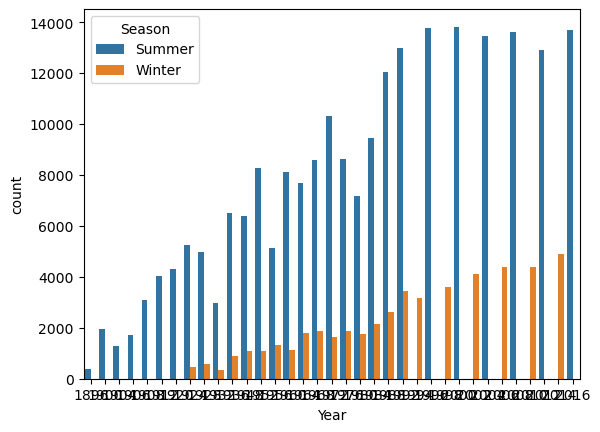

In [78]:
# compter le nombre total de medailles par années
sns.countplot(x='Year', hue='Season', data=jeux)

#### Q4. Cherchons à caractériser certaines distributions.

#### Q4.1. Générez une figure avec trois boîtes à moustaches, côte à côte, pour les âges, les tailles et les poids. Faites apparaître les outliers.

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Weight'>

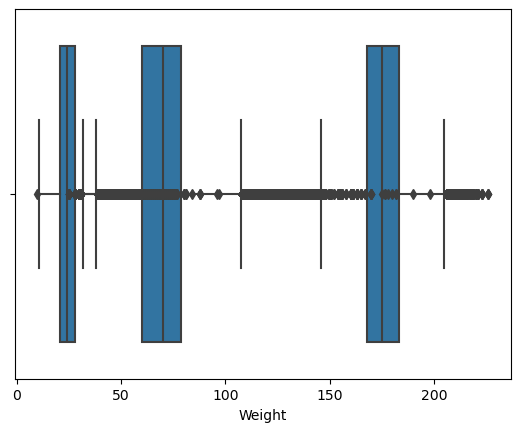

In [80]:
sns.boxplot(jeux, x='Age')
sns.boxplot(jeux, x='Height')
sns.boxplot(jeux, x='Weight')

#### Q4.2. Caractérisez les distributions d’âge, de taille et de poids avec les valeurs moyenne et médiane, la variance, l’asymétrie et l’aplatissement.

In [86]:
jeux[['Age', 'Height', 'Weight']].mean()
jeux[['Age', 'Height', 'Weight']].median()
jeux[['Age', 'Height', 'Weight']].var()
jeux[['Age', 'Height', 'Weight']].skew()
jeux[['Age', 'Height', 'Weight']].kurtosis()

Age       6.270642
Height    0.177728
Weight    2.017523
dtype: float64

#### Q4.3. Parmi ces 3 variables, laquelle s’étale le plus (à droite ou à gauche) ? laquelle est la plus centrée ? laquelle a le plus d’amplitude ?

#### Q4.4. Tracez les distributions empiriques des âges, des tailles et des poids côte-à-côte sur la même figure et vérifiez vos assertions.

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: xlabel='Weight', ylabel='count'>

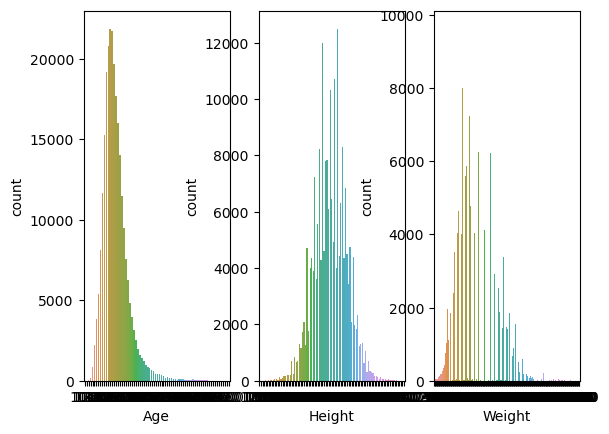

In [90]:
fig, axs = plt.subplots(ncols=3)
sns.countplot(jeux, x='Age', ax=axs[0])
sns.countplot(jeux, x='Height', ax=axs[1])
sns.countplot(jeux, x='Weight', ax=axs[2])

#### Q4.5. Entre ces 3 variables, entre lesquelles y-a-t-il la plus grande corrélation ?